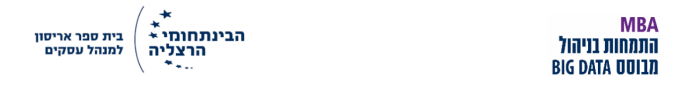


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<font size="7">ML Methodologies for Business</font> <br>
<font size="6">Assignment 1 - Deep Learning</font> <br>
<font size="5">Itay Oren</font>

# Classift Images of Clothing  - The Ref Model (turorial 1)

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout
from keras.models import Sequential
from keras.optimizers import SGD
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
import os
import pandas as pd
import cv2

## Load the data

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist

(train_validation_images, train_validation_labels), (test_x, test_y) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
from sklearn.model_selection import train_test_split
train_x, validation_x, train_y, validation_y = train_test_split(train_validation_images, train_validation_labels, test_size = 0.1, random_state=42)

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
train_x.shape

(54000, 28, 28)

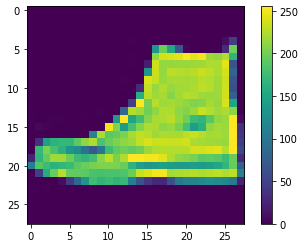

In [ ]:
plt.figure()
plt.imshow(train_x[2])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
train_x = train_x / 255.0
validation_x = validation_x / 255.0
test_x = test_x / 255.0

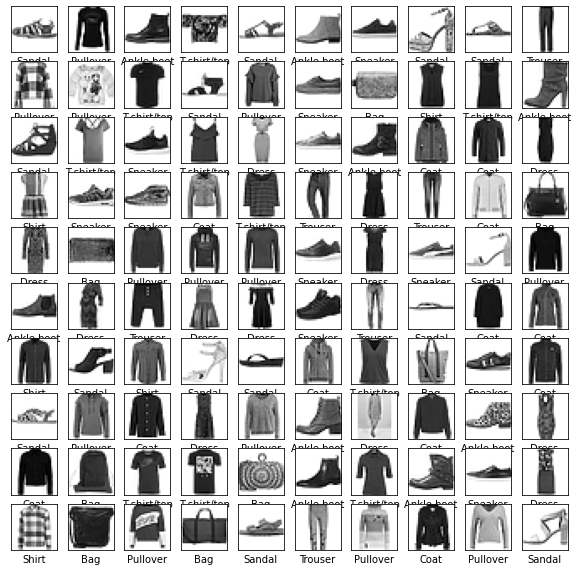

In [ ]:
plt.figure(figsize=(10,10))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_x[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_y[i]])
plt.show()

In [ ]:
ref_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [ ]:
ref_model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
history = ref_model.fit(train_x, train_y, batch_size=32, epochs=30, verbose=1,  validation_data=(validation_x, validation_y))

Epoch 1/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.5098 - accuracy: 0.8217 - val_loss: 0.4092 - val_accuracy: 0.8553
Epoch 2/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3805 - accuracy: 0.8635 - val_loss: 0.3949 - val_accuracy: 0.8570
Epoch 3/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3429 - accuracy: 0.8743 - val_loss: 0.3890 - val_accuracy: 0.8588
Epoch 4/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3166 - accuracy: 0.8833 - val_loss: 0.3506 - val_accuracy: 0.8722
Epoch 5/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3000 - accuracy: 0.8894 - val_loss: 0.3357 - val_accuracy: 0.8730
Epoch 6/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.2856 - accuracy: 0.8945 - val_loss: 0.3224 - val_accuracy: 0.8842
Epoch 7/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.2720 - accuracy: 0.8992 - val_loss: 0.3293 - val_accuracy:

## Ref Model Results 

In [ ]:
test_loss, test_acc = ref_model.evaluate(test_x,  test_y, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.4073 - accuracy: 0.8856

Test accuracy: 0.8855999708175659


In [ ]:
accuracy = ref_model.evaluate(x=train_x,y=train_y,batch_size=320)
print("Train Set Accuracy: ",accuracy)
accuracy = ref_model.evaluate(x=validation_x,y=validation_y,batch_size=320)
print("Validation Set Accuracy: ",accuracy)
accuracy = ref_model.evaluate(x=test_x,y=test_y,batch_size=320)
print("Test Set Accuracy: ",accuracy)

169/169 [==============================] - 0s 2ms/step - loss: 0.1374 - accuracy: 0.9483
Train Set Accuracy:  [0.1374363750219345, 0.9483333230018616]
19/19 [==============================] - 0s 2ms/step - loss: 0.3860 - accuracy: 0.8855
Validation Set Accuracy:  [0.3860037326812744, 0.8855000138282776]
32/32 [==============================] - 0s 2ms/step - loss: 0.4073 - accuracy: 0.8856
Test Set Accuracy:  [0.40734100341796875, 0.8855999708175659]


**As Can be seen, test accuracy is 88,7%**
We tried to compile with different comile method  all gave ~same results
Compile with Optimizer Adam - got 0.88
Compile with SGD - 0.893
Compile with RMSprop - 0.873
Compile with Adadelta - 0.886
Compile with adagrad - 0.837
Compile with adamx - 0.885
Compile with Nadam - 0.886
Compile with FTRL - 0.775




dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


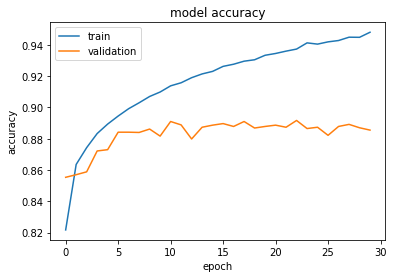

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Our Model optimization  - Solution

# Part 1 - Dive Deep

### Reading the dataset

In [ ]:
train_x, validation_x, train_y, validation_y = train_test_split(train_validation_images, train_validation_labels, test_size = 0.1, random_state=42)

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist

(train_validation_images, train_validation_labels), (test_x, test_y) = fashion_mnist.load_data()

In [ ]:
train_x = train_x / 255.0
validation_x = validation_x / 255.0
test_x = test_x / 255.0

### Reshaping the data set
transforming  into 4 vecotr array , thus it will be enabled on CNN model

In [ ]:
train_x = train_x.reshape(train_x.shape[0],28,28,1).astype('float32')/255
validation_x = validation_x.reshape(validation_x.shape[0],28,28,1).astype('float32')/255
test_x = test_x.reshape(test_x.shape[0],28,28,1).astype('float32')/255

train_y = keras.utils.to_categorical(train_y,10)
validation_y = keras.utils.to_categorical(validation_y,10)
test_y = keras.utils.to_categorical(test_y,10)

print('MNIST Data prepared.\n\tTrain set size: X: {}, y: {}.\n\tValidation set size: X: {}, y: {}\n\tTest set size: X: {}, y: {}.'.format(train_x.shape, train_y.shape,validation_x.shape, validation_y.shape,test_x.shape, test_y.shape))

MNIST Data prepared.
	Train set size: X: (54000, 28, 28, 1), y: (54000, 10).
	Validation set size: X: (6000, 28, 28, 1), y: (6000, 10)
	Test set size: X: (10000, 28, 28, 1), y: (10000, 10).


## **Train our Model**

### Defining the learning rate jumps (LR).
  During our test we have checked several options, and saw that after ~10 first iteration we are getting into flat optimization, thus, our jumps are in steps of 10 ephochs

In [ ]:
import numpy as np
from keras.callbacks import LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau
 
def lr_schedule(epoch):
    """Learning Rate Schedule

    Learning rate is scheduled to be reduced after 5 and 10 epochs.
    Called automatically every epoch as part of callbacks during training.
 
    # Arguments
        epoch (int): The number of epochs
 
    # Returns
        lr (float32): learning rate
    """
    lr = 1e-3
    if epoch > 40:
        lr *= 0.5e-3
    elif epoch > 30:
        lr *= 1e-3
    elif epoch > 20:
        lr *= 1e-2    
    elif epoch > 10:
        lr *= 1e-1
    print('Learning rate: ', lr)
    return lr
 
 
# Prepare callbacks for learning rate adjustment.
lr_scheduler = LearningRateScheduler(lr_schedule)
 
lr_reducer = ReduceLROnPlateau(factor=np.sqrt(0.1), cooldown=0, patience=5,min_lr=0.5e-6)
 
callbacks = [lr_reducer, lr_scheduler]

### Model optimization 
we have checked several models.. 
1. we saw that in 2 convolutions stages, we are getting to ~89% limit, adding one more stage improved the model by ~2% , however cost run time.
2. we noticed that the largest the kernel is (we went with 5x5) the better the results we are getting (2x2) - will reach ~1-2% lower.
3. in general the more params we will get , the better the model will get (we got to 216K)


In [ ]:
model = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.BatchNormalization(input_shape=train_x.shape[1:]))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(5,5), padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2),strides=(2,2)))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(5,5), padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2),strides=(2,2) ))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(4,4), padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2),strides=(2,2) ))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2),strides=(2,2) ))
model.add(tf.keras.layers.Dropout(0.25))


model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))


In [ ]:
from keras.optimizers import Adam
optimizer = Adam(lr=lr_schedule(0))
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
model.summary()

Learning rate:  0.001
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 28, 28, 1)         4         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 64)        1664      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        102464    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (No

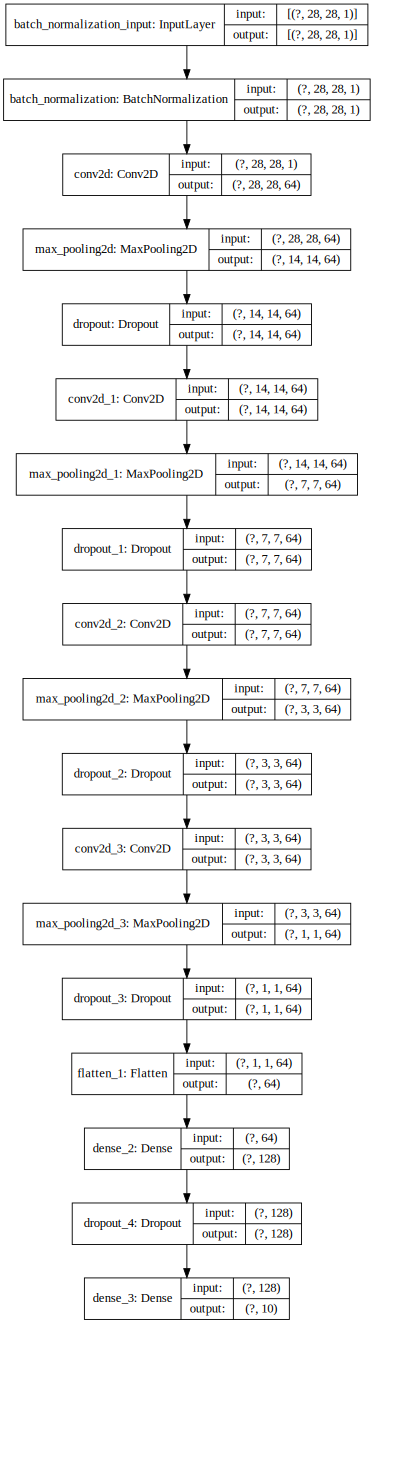

In [ ]:
import pydot
from IPython.display import SVG # requires pydot and graphviz
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(model,show_shapes=True, show_layer_names=True,dpi=65).create(prog='dot', format='svg'))

### Conclusions from the Model definition - 
We have "played" a lot with the batch_size number and ephochs. in general , as less the batches are the better the perf' and the higher the epochs are the higher the perf'

In [ ]:
history = model.fit(train_x,train_y,batch_size=10, epochs=50, verbose=1,  validation_data=(validation_x, validation_y), callbacks=callbacks)

Learning rate:  0.001
Epoch 1/50
5400/5400 [==============================] - 19s 3ms/step - loss: 0.6844 - accuracy: 0.7499 - val_loss: 0.3915 - val_accuracy: 0.8535
Learning rate:  0.001
Epoch 2/50
5400/5400 [==============================] - 18s 3ms/step - loss: 0.4482 - accuracy: 0.8419 - val_loss: 0.3328 - val_accuracy: 0.8763
Learning rate:  0.001
Epoch 3/50
5400/5400 [==============================] - 18s 3ms/step - loss: 0.4054 - accuracy: 0.8559 - val_loss: 0.3202 - val_accuracy: 0.8847
Learning rate:  0.001
Epoch 4/50
5400/5400 [==============================] - 18s 3ms/step - loss: 0.3863 - accuracy: 0.8638 - val_loss: 0.3221 - val_accuracy: 0.8818
Learning rate:  0.001
Epoch 5/50
5400/5400 [==============================] - 18s 3ms/step - loss: 0.3752 - accuracy: 0.8681 - val_loss: 0.2973 - val_accuracy: 0.8897
Learning rate:  0.001
Epoch 6/50
5400/5400 [==============================] - 19s 3ms/step - loss: 0.3655 - accuracy: 0.8704 - val_loss: 0.3002 - val_accuracy: 0.888

In [ ]:
test_loss, test_acc = model.evaluate(test_x,  test_y, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.2453 - accuracy: 0.9110

Test accuracy: 0.9110000133514404


As we can see, our results (91%) are better than the reference model results of 88%

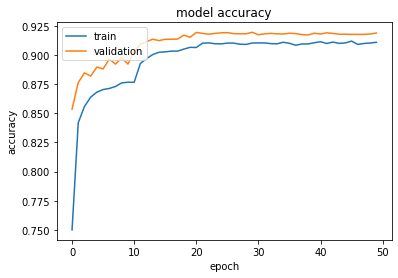

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

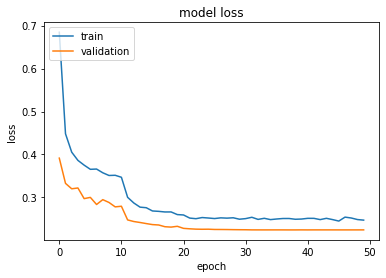

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
model.save('Udi_Itay_Fmnist.model')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: Udi_Itay_Fmnist.model/assets


## **Calculate Accuracy**

### Our Model Accuracy 

In [ ]:
accuracy = model.evaluate(x=train_x,y=train_y,batch_size=320)
print("Train Set Accuracy: ",accuracy[1])
accuracy = model.evaluate(x=validation_x,y=validation_y,batch_size=320)
print("Validation Set Accuracy: ",accuracy[1])
accuracy = model.evaluate(x=test_x,y=test_y,batch_size=320)
print("Test Set Accuracy: ",accuracy[1])
print(test_x.shape)
print(test_y.shape)
print(test_y[1])

169/169 [==============================] - 1s 8ms/step - loss: 0.1806 - accuracy: 0.9315
Train Set Accuracy:  0.9314629435539246
19/19 [==============================] - 0s 7ms/step - loss: 0.2246 - accuracy: 0.9188
Validation Set Accuracy:  0.918833315372467
32/32 [==============================] - 0s 8ms/step - loss: 0.2453 - accuracy: 0.9110
Test Set Accuracy:  0.9110000133514404
(10000, 28, 28, 1)
(10000, 10)
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


# Part 2 - "Does it really work?"

The data was taken from from here: https://www.kaggle.com/agrigorev/clothing-dataset-full?select=images.csv

In [ ]:
# Clone the entire repo.
!git clone -l -s https://github.com/alexeygrigorev/clothing-dataset.git cloned-repo
%cd cloned-repo
!ls

Cloning into 'cloned-repo'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 5784 (delta 10), reused 0 (delta 0), pack-reused 5766
Receiving objects: 100% (5784/5784), 152.66 MiB | 45.73 MiB/s, done.
Resolving deltas: 100% (11/11), done.
/content/cloned-repo
images	images.csv  LICENSE  README.md


In [ ]:
images_data = pd.read_csv('/content/cloned-repo/images.csv')
images_data.label.unique()

array(['Not sure', 'T-Shirt', 'Shoes', 'Shorts', 'Shirt', 'Pants',
       'Skirt', 'Other', 'Top', 'Outwear', 'Dress', 'Body', 'Longsleeve',
       'Undershirt', 'Hat', 'Polo', 'Blouse', 'Hoodie', 'Skip', 'Blazer'],
      dtype=object)

The data imported doesn't have the exact same labels, thus we needed to remove some of the labels (and those images as well) and change the name of the labels in order to match them to the model's categories as such:



1.  'T-Shirt', 'Top' -> 'T-shirt/top'
2.   'Shoes' -> 'Sneaker'
1.   'Shirt' -> 'Shirt'
2.   'Pants' -> 'Trouser'
1.   'Dress' -> 'Dress'
2.   'Longsleeve' ->  'Pullover'
1.   'Blazer' -> 'Coat'















In [ ]:
wanted_categories = ['T-Shirt', 'Shoes', 'Shirt', 'Pants','Dress', 'Longsleeve', 'Blazer', 'Top']
images_df = images_data[images_data.label.isin(wanted_categories)]
images_df.label.unique()

array(['T-Shirt', 'Shoes', 'Shirt', 'Pants', 'Top', 'Dress', 'Longsleeve',
       'Blazer'], dtype=object)

In [ ]:
label_dict = {'T-Shirt': 'T-shirt/top',  'Shoes' : 'Sneaker', 'Pants' : 'Trouser', 'Top' :  'T-shirt/top', 'Longsleeve' :  'Pullover', 'Blazer' : 'Coat'}
images_df.label.replace(label_dict, inplace=True)
images_df.rename({"image": "id"}, axis=1, inplace=True)
images_df.label.unique()

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4581: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


array(['T-shirt/top', 'Sneaker', 'Shirt', 'Trouser', 'Dress', 'Pullover',
       'Coat'], dtype=object)

In [ ]:
images_df.head()

,id,sender_id,label,kids
1,ea7b6656-3f84-4eb3-9099-23e623fc1018,148,T-shirt/top,False
3,ea2ffd4d-9b25-4ca8-9dc2-bd27f1cc59fa,43,T-shirt/top,False
4,3b86d877-2b9e-4c8b-a6a2-1d87513309d0,189,Sneaker,False
6,b0c03127-9dfb-4573-8934-1958396937bf,138,Shirt,False
7,4c8f245e-a039-46fd-a6b9-1bb51e83fc05,226,T-shirt/top,False


### Loading and preparing the images

In [ ]:
def prepare(filepath):
  try:
    IMG_SIZE = 28
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(IMG_SIZE, IMG_SIZE)
  except:
    return

In [ ]:
img_folder_df = pd.DataFrame(columns = ['id', 'IMG_PIX'])

idx = 0 
for img in os.listdir("/content/cloned-repo/images"):
  if img != '':
    img_folder_df.loc[idx, 'id'] = os.path.basename(img)[:-4]
    img_folder_df.loc[idx, 'IMG_PIX'] = prepare("/content/cloned-repo/images/"+img)
    idx += 1

In [ ]:
img_folder_df.head()

,id,IMG_PIX
0,fef9c050-3515-4229-8f1c-215cc156df2c,"[[194, 196, 191, 198, 198, 199, 201, 202, 202,..."
1,b6661384-0c79-4979-ba83-dc74282e4dad,"[[141, 163, 168, 155, 171, 160, 192, 200, 190,..."
2,33734ef5-f035-461e-96d0-9115d2de49e8,"[[64, 73, 79, 69, 80, 90, 71, 91, 88, 81, 86, ..."
3,8be7c890-535e-4150-8b40-9b3552798470,"[[152, 153, 157, 158, 152, 161, 157, 164, 170,..."
4,112c0b70-cdf7-4cb2-800f-e4f68f2d7a81,"[[193, 191, 198, 189, 186, 188, 187, 190, 184,..."


### Merging the images data with the description csv file

In [ ]:
merged_df = pd.merge(img_folder_df, images_df[['id', 'label']], on = 'id')
merged_df.head()

,id,IMG_PIX,label
0,fef9c050-3515-4229-8f1c-215cc156df2c,"[[194, 196, 191, 198, 198, 199, 201, 202, 202,...",Dress
1,33734ef5-f035-461e-96d0-9115d2de49e8,"[[64, 73, 79, 69, 80, 90, 71, 91, 88, 81, 86, ...",Pullover
2,8be7c890-535e-4150-8b40-9b3552798470,"[[152, 153, 157, 158, 152, 161, 157, 164, 170,...",Coat
3,112c0b70-cdf7-4cb2-800f-e4f68f2d7a81,"[[193, 191, 198, 189, 186, 188, 187, 190, 184,...",T-shirt/top
4,68ff2e07-5cee-42f1-a727-2c7d0b1912bd,"[[61, 87, 116, 84, 103, 123, 106, 126, 116, 11...",Trouser


### Taking a look at the new image data

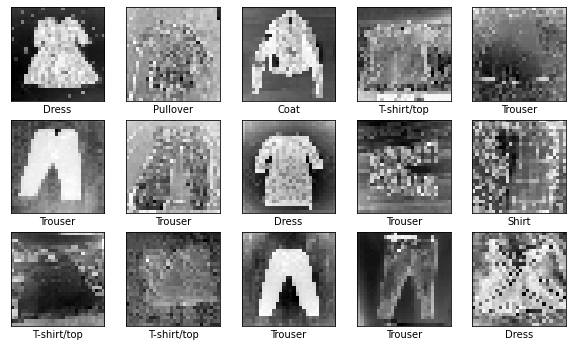

In [ ]:
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(merged_df.IMG_PIX[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(merged_df.label[i])
plt.show()

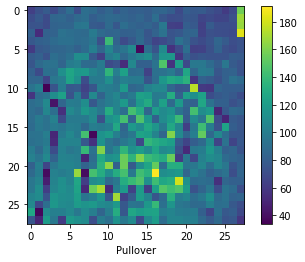

In [ ]:
plt.figure()
plt.imshow(merged_df.IMG_PIX[1].reshape(28, 28))
plt.colorbar()
plt.grid(False)
plt.xlabel(merged_df.label[1])
plt.show()

Labels need to be changed into integers as the model expects:

https://keras.io/api/datasets/fashion_mnist/

In [ ]:
merged_df.label = merged_df.label.replace({'T-shirt/top' : 0,'Trouser' : 1, 'Pullover' : 2, 'Dress' : 3, 'Coat' : 4, 'Shirt' : 6, 'Sneaker' : 7})

In [ ]:
merged_df.head()

,id,IMG_PIX,label
0,fef9c050-3515-4229-8f1c-215cc156df2c,"[[194, 196, 191, 198, 198, 199, 201, 202, 202,...",3
1,33734ef5-f035-461e-96d0-9115d2de49e8,"[[64, 73, 79, 69, 80, 90, 71, 91, 88, 81, 86, ...",2
2,8be7c890-535e-4150-8b40-9b3552798470,"[[152, 153, 157, 158, 152, 161, 157, 164, 170,...",4
3,112c0b70-cdf7-4cb2-800f-e4f68f2d7a81,"[[193, 191, 198, 189, 186, 188, 187, 190, 184,...",0
4,68ff2e07-5cee-42f1-a727-2c7d0b1912bd,"[[61, 87, 116, 84, 103, 123, 106, 126, 116, 11...",1


### Running the new data on our model

In [ ]:
X = np.array([merged_df.IMG_PIX], dtype=np.float32)
Y = np.array([merged_df.label])
Y = keras.utils.to_categorical(Y.reshape(Y.shape[1],),10)
accuracy = model.evaluate(x=X.reshape(X.shape[1],28,28,1), y=Y, batch_size=320)
print("Ebay data accuracy: ",accuracy[1])

12/12 [==============================] - 0s 15ms/step - loss: 266848.1250 - accuracy: 0.0637
Ebay data accuracy:  0.06370967626571655


As we can see, the model doesn't handle the new data well at all.  A very low accuracy in comparison to the original test data

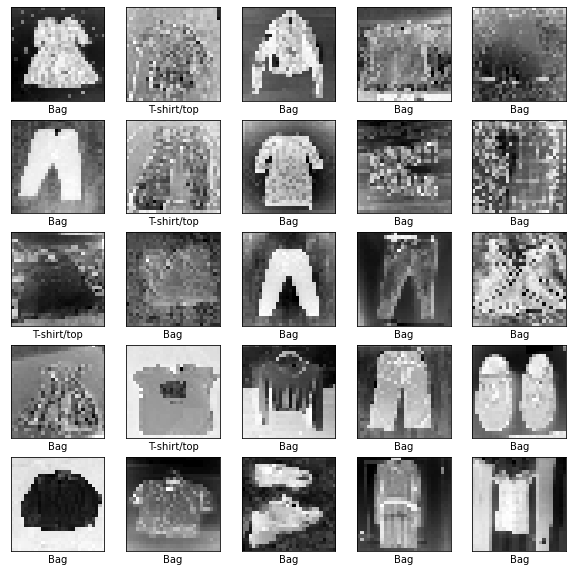

In [ ]:
prediction = model.predict(X.reshape(X.shape[1],28,28,1))
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X.reshape(X.shape[1],28,28)[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[int(np.argmax(prediction[i]))])
plt.show()

### Conclusions
1. We can see from the new photos prediction labels, that many are being considered as "bag". In order for this model to work on the new photos as well, we would need to train the model on these new photos or remove the "bag" label from this prediction since we know there are no photos of bags in the new dataset . More photos, more data means higher accuracy for new objects
2. we can see that we lost a lot of data and accuracy on our data set once we have converted it from its' orginal shape and size. also some of the picture are new to the model (for example - 2 sandals.. where the model does not know how to recognize).
3. Some of the picture are also a bit augmented, and need some fixing prior to enter into the model. 

### **Answer to 2c**: 
This would not be likely without training the model on many more images. For instance, the images we've uploaded are photos regular people took of their cloths. Somethimes on the floor, sometimes on the bed. Sometimes hanging and in other forms of reszolutions and sizes. Considering Ebay for example, this is how regular people sell their products - we can't assume that all photos will be taken in the same charecteristics and thus be unified. In order to support this, our model would have to
a.  include much more photos to train with and see all sorts of images taken before it can predict accurately new photos 
b. inserting some filtering to the picture which will include croping, fixing the augmaentation, focus and more.


# Part 3 - "Let's try some Magic"

In [ ]:
model.save('Udi_Itay_Fmnist.model')
model=tf.keras.models.load_model('Udi_Itay_Fmnist.model')

INFO:tensorflow:Assets written to: Udi_Itay_Fmnist.model/assets


In [ ]:
from PIL import Image 
from matplotlib import pyplot as plt

In [ ]:
def display_image(img):
    from matplotlib import pyplot as plt
    plt.imshow(img, interpolation='nearest',cmap='gray')
    plt.axis('off')
    plt.show()

## **Convert the image to Blury and Contour shape**




In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(train_validation_images, train_validation_labels), (test_x, test_y) = fashion_mnist.load_data()
from sklearn.model_selection import train_test_split
train_x, validation_x, train_y, validation_y = train_test_split(train_validation_images, train_validation_labels, test_size = 0.1, random_state=42)

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
train_x.shape

(54000, 28, 28)

In [ ]:
train_x = train_x /255.0
validation_x = validation_x / 255.0
test_x = test_x / 255.0
train_y = keras.utils.to_categorical(train_y,10)

***Testing the Blurry and Contour convolution on one picture, and see that the size of the picture is 30x30, so will need 2dim reduction***

Original picutre


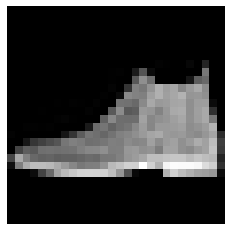

Blurry convolution to original picutre


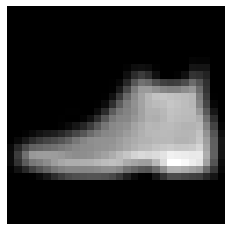

Contour convolution to original picutre


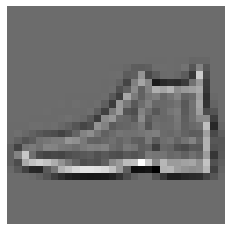

In [ ]:
from scipy.signal import convolve2d
kernel_1 = np.array([[1, 1, 1],[1, 1, 1], [1, 1, 1]], dtype=float)
kernel_1 /= np.sum(kernel_1)
img = test_x[0]
img_1 = convolve2d(img, kernel_1,mode = 'full',boundary = 'fill', fillvalue = 0 )
kernel_2 = np.array([[-1, -1, -1],[-1, 8, -1], [-1, -1, -1]])
img_2 = convolve2d(img, kernel_2,mode = 'full',boundary = 'fill', fillvalue = 0 )
print("Original picutre")
display_image(img)
print("Blurry convolution to original picutre")
display_image(img_1)
print("Contour convolution to original picutre")
display_image(img_2)

## Answer to 3a 
**Creating the artificial data set**
For our convinient we have chosen to create one blurry dataset and one contour data set. the artificail data set will be a combination of both.
As we will see, the model perfrom much better on the blurry data set than on the contour one. 

In [ ]:
array_size = train_x.shape[0]
val_size = validation_x.shape[0]
temp_pic1 = img_1.copy()
temp_pic2 = img_1.copy()
blur_train_x=train_x.copy()
cont_train_x=train_x.copy()
blur_validation_x=validation_x.copy()
cont_validation_x=validation_x.copy()
artifitial_train_x= np.zeros((2*array_size,28,28))
artifitial_train_y= np.zeros((2*array_size,10))

for i in range(array_size) :
  temp_pic1= convolve2d(train_x[i], kernel_1,mode = 'full',boundary = 'fill', fillvalue = 0 )  
  blur_train_x[i] = temp_pic1[1:29,1:29]
  temp_pic2= convolve2d(train_x[i], kernel_2,mode = 'full',boundary = 'fill', fillvalue = 0 )
  cont_train_x[i] = temp_pic2[1:29,1:29]

for i in range(val_size) :
  temp_pic1= convolve2d(validation_x[i], kernel_1,mode = 'full',boundary = 'fill', fillvalue = 0 )
  blur_validation_x[i] = temp_pic1[1:29,1:29]
  temp_pic2= convolve2d(validation_x[i], kernel_2,mode = 'full',boundary = 'fill', fillvalue = 0 )
  cont_validation_x[i] = temp_pic2[1:29,1:29]

j=0
for i in range(array_size) :
  temp_pic1= convolve2d(train_x[i], kernel_1,mode = 'full',boundary = 'fill', fillvalue = 0 )
  artifitial_train_x[j] = temp_pic1[1:29,1:29]
  artifitial_train_y[j] = train_y[i]
  j=j+1
  temp_pic2= convolve2d(train_x[i], kernel_2,mode = 'full',boundary = 'fill', fillvalue = 0 )
  artifitial_train_y[j] = train_y[i]
  artifitial_train_x[j] = temp_pic2[1:29,1:29]
  j=j+1


In [ ]:
print('X Shape:', artifitial_train_x.shape)
print('Y Shape:', artifitial_train_y.shape)

X Shape: (108000, 28, 28)
Y Shape: (108000, 10)


### ***Testing our model on the new annotated data***
As we will see - the model is 87% accurate on the blury data base, however 46% accurate on the contour data set.
**The result on the total Artifical data set is 67% (Answer to 3b) **

## Answer to 3b
***Testing on the contour data set***

In [ ]:
cont_train_x = cont_train_x.reshape(cont_train_x.shape[0],28,28,1).astype('float32')/255
prediction = model.predict(cont_train_x)
accuracy = model.evaluate(x=cont_train_x,y=train_y,batch_size=320)
print("Contour Set Accuracy: ",accuracy[1])

169/169 [==============================] - 1s 7ms/step - loss: 6.1540 - accuracy: 0.3241
Contour Set Accuracy:  0.32411110401153564


In [ ]:
cont_train_x = cont_train_x.reshape(cont_train_x.shape[0],28,28).astype('float32')/255

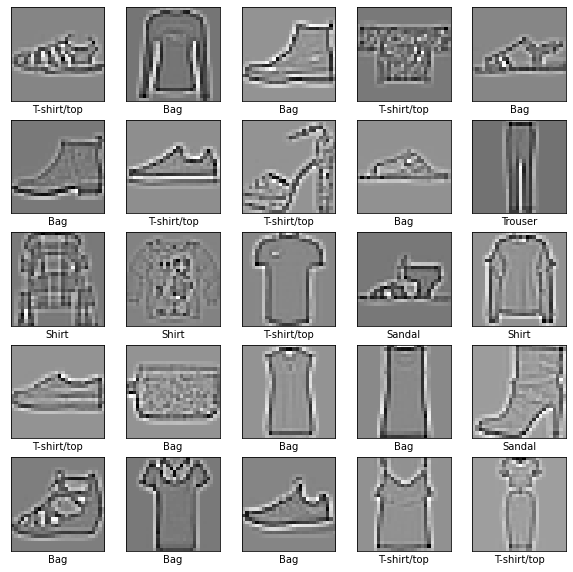

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(cont_train_x[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[int(np.argmax(prediction[i]))])
plt.show()

### ***Testing on the blury data set***

In [ ]:
blur_train_x = blur_train_x.reshape(blur_train_x.shape[0],28,28,1).astype('float32')/255
prediction = model.predict(blur_train_x)
accuracy = model.evaluate(x=blur_train_x,y=train_y,batch_size=320)
print("Blur Set Accuracy: ",accuracy[1])

169/169 [==============================] - 1s 7ms/step - loss: 0.3419 - accuracy: 0.8668
Blur Set Accuracy:  0.866777777671814


In [ ]:
blur_train_x = blur_train_x.reshape(cont_train_x.shape[0],28,28).astype('float32')/255

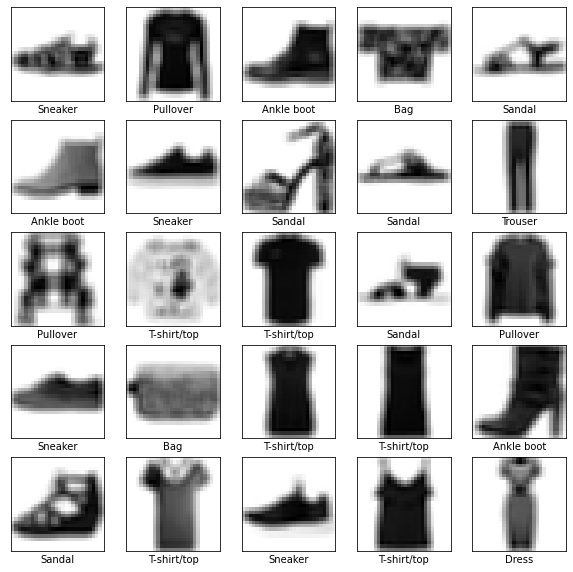

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(blur_train_x[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[int(np.argmax(prediction[i]))])
plt.show()

### Conclusion
As we can see, our model preformed better on the Blurry data set (88%) , where on the countour we scored 43%. Our understanding is that the Blurry data set is simliar to the original (white background and dark pictures, which mimic the model kernel looking) , which the countour flipper the backgournd and make it harder to understand where the picture is.

### **Testing on the artifial data set**



In [ ]:
artifitial_train_x = artifitial_train_x.reshape(artifitial_train_x.shape[0],28,28,1).astype('float32')/255
prediction = model.predict(artifitial_train_x)
accuracy = model.evaluate(x=artifitial_train_x,y=artifitial_train_y,batch_size=320)
print("Artificial Set Accuracy: ",accuracy[1])

338/338 [==============================] - 2s 7ms/step - loss: 3.2480 - accuracy: 0.5954
Artificial Set Accuracy:  0.5954444408416748


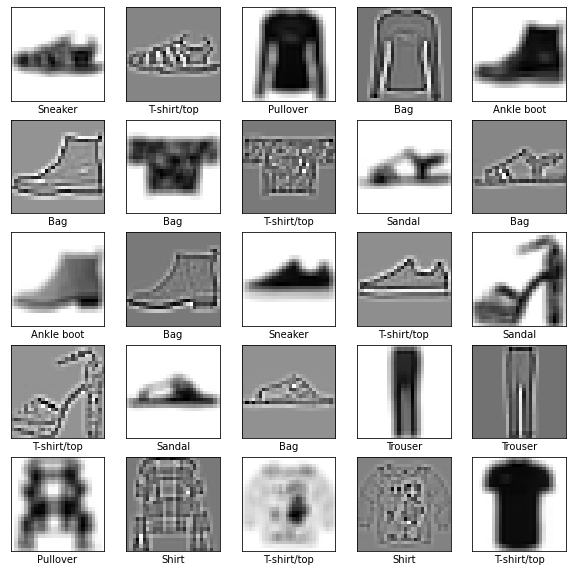

In [ ]:
artifitial_train_x = artifitial_train_x.reshape(artifitial_train_x.shape[0],28,28).astype('float32')/255
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(artifitial_train_x[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[int(np.argmax(prediction[i]))])
plt.show()

### Conclusion
As can be seen the result on the arrtifical combined data set it **65%**, which is the average of the blurry and contour data set.

## Anser to 3C - 
**Fiting the model based on the combined data - the artificial and original train model**

#### merging the artificail and the original trained data
We will define the merged data set in which pictureN will be the orginal picture, pictureN+1 will be the blurry picture and pictureN+2 will be the contour picture.
Both operation will be done for the train and validation datasets

In [ ]:
array_size = train_x.shape[0]
merged_train_x= np.zeros((3*array_size,28,28))
merged_train_y= np.zeros((3*array_size,10))
merged_validation_x= np.zeros((3*val_size,28,28))
merged_validation_y= np.zeros((3*val_size))

j=0
for i in range(array_size) :
  merged_train_x[j] = train_x[i]
  merged_train_y[j] = train_y[i]
  j=j+1
  merged_train_x[j] = blur_train_x[i]
  merged_train_y[j] = train_y[i]
  j=j+1
  merged_train_x[j] = cont_train_x[i]
  merged_train_y[j] = train_y[i]
  j=j+1

j=0
for i in range(val_size) :
  merged_validation_x[j] = validation_x[i]
  merged_validation_y[j] = validation_y[i]
  j=j+1
  merged_validation_x[j] = blur_validation_x[i]
  merged_validation_y[j] = validation_y[i]
  j=j+1
  merged_validation_x[j] = cont_validation_x[i]
  merged_validation_y[j] = validation_y[i]
  j=j+1

In [ ]:
merged_train_y.shape

(162000, 10)

In [ ]:
print(train_y[8])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
print(merged_validation_y[17996]);print(validation_y[5998]);

6.0
6


### Fiting the model on the new merged trained data
#### Defining a new model (which is exactly the same as our prev model) - just in order not to overwrite it

In [ ]:
merged_train_x = merged_train_x.reshape(merged_train_x.shape[0],28,28,1).astype('float32')/255
merged_validation_x = merged_validation_x.reshape(merged_validation_x.shape[0],28,28,1).astype('float32')/255
merged_validation_y = keras.utils.to_categorical(merged_validation_y,10)

print('Data prepared.\n\tTrain set size: X: {}, y: {}.\n\tValidation set size: X: {}, y: {}.\n\t'.format(merged_train_x.shape, merged_train_y.shape,merged_validation_x.shape, merged_validation_y.shape))

Data prepared.
	Train set size: X: (162000, 28, 28, 1), y: (162000, 10).
	Validation set size: X: (18000, 28, 28, 1), y: (18000, 10).
	


In [ ]:
new_model = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
new_model.add(tf.keras.layers.BatchNormalization(input_shape=merged_train_x.shape[1:]))
new_model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(5,5), padding='same', activation='relu', input_shape=(28,28,1))) 
new_model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2),strides=(2,2)))
new_model.add(tf.keras.layers.Dropout(0.25))

new_model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(5,5), padding='same', activation='relu'))
new_model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2),strides=(2,2) ))
new_model.add(tf.keras.layers.Dropout(0.25))

new_model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(4,4), padding='same', activation='relu'))
new_model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2),strides=(2,2) ))
new_model.add(tf.keras.layers.Dropout(0.25))

new_model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
new_model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2),strides=(2,2) ))
new_model.add(tf.keras.layers.Dropout(0.25))


new_model.add(tf.keras.layers.Flatten())
new_model.add(tf.keras.layers.Dense(128, activation='relu'))
new_model.add(tf.keras.layers.Dropout(0.5))
new_model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [ ]:
from keras.optimizers import Adam
optimizer = Adam(lr=lr_schedule(0))
new_model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
new_model.summary()

Learning rate:  0.001
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_1 (Batch (None, 28, 28, 1)         4         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 64)        1664      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 64)        102464    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_6 (Dropout)          (No

In [ ]:
history = new_model.fit(merged_train_x,merged_train_y,batch_size=30, epochs=50, verbose=1,  validation_data=(merged_validation_x, merged_validation_y), callbacks=callbacks)

Learning rate:  0.001
Epoch 1/50
5400/5400 [==============================] - 22s 4ms/step - loss: 1.7754 - accuracy: 0.3108 - val_loss: 1.0513 - val_accuracy: 0.7496
Learning rate:  0.001
Epoch 2/50
5400/5400 [==============================] - 22s 4ms/step - loss: 1.6909 - accuracy: 0.3446 - val_loss: 0.9721 - val_accuracy: 0.7564
Learning rate:  0.001
Epoch 3/50
5400/5400 [==============================] - 22s 4ms/step - loss: 1.6763 - accuracy: 0.3498 - val_loss: 0.8969 - val_accuracy: 0.7553
Learning rate:  0.001
Epoch 4/50
5400/5400 [==============================] - 23s 4ms/step - loss: 1.6695 - accuracy: 0.3517 - val_loss: 1.4135 - val_accuracy: 0.7523
Learning rate:  0.001
Epoch 5/50
5400/5400 [==============================] - 22s 4ms/step - loss: 1.6652 - accuracy: 0.3535 - val_loss: 1.6049 - val_accuracy: 0.7340
Learning rate:  0.001
Epoch 6/50
5400/5400 [==============================] - 22s 4ms/step - loss: 1.6602 - accuracy: 0.3560 - val_loss: 1.5044 - val_accuracy: 0.738

In [ ]:
test_x.shape

(10000, 28, 28)

In [ ]:
accuracy = new_model.evaluate(x=test_x.reshape(test_x.shape[0],28,28,1),y=( keras.utils.to_categorical(test_y,10)),batch_size=320)
print("Artificial Set Accuracy: ",accuracy[1])

32/32 [==============================] - 0s 7ms/step - loss: 100.7755 - accuracy: 0.7740
Artificial Set Accuracy:  0.7739999890327454


### Trying the new images from part 2 on the model for the second time

In [ ]:
accuracy = new_model.evaluate(x=X.reshape(X.shape[1],28,28,1), y=Y, batch_size=320)
print("Ebay data accuracy: ",accuracy[1])

12/12 [==============================] - 0s 6ms/step - loss: 606068.1250 - accuracy: 0.2685
Ebay data accuracy:  0.2685483992099762


### Conclusions - 
1. As we can see training the model on the new artificail data, degraded it's performance with regard to the original data set - 91% -> 81%. 
2. On the other hand, we can see that once using this data on a new model there is an improvment from 65->81%.
3. Testing our own data on the model improved it to 27% (~20% improvment). we can see that the data we took was in poor quality and also included elements (like pair items) which does not exist in our original trained model.
